From http://hanzratech.in/2015/02/24/handwritten-digit-recognition-using-opencv-sklearn-and-python.html

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

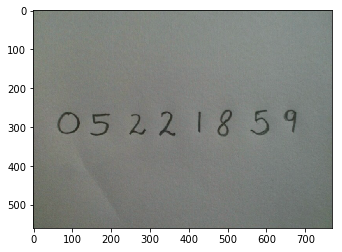

In [2]:
# Convert to grayscale and apply Gaussian filtering
im = cv2.imread("../data/handwrite-digits-1.jpg")
plt.imshow(im)

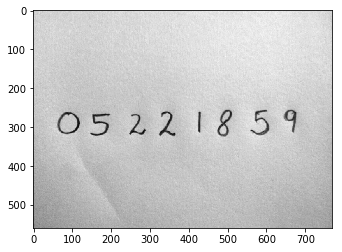

In [3]:
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
plt.imshow(im_gray, cmap='gray')

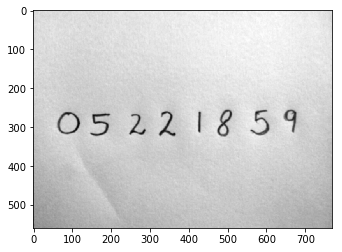

In [4]:
im_gray2 = cv2.GaussianBlur(im_gray, (5, 5), 0)
plt.imshow(im_gray2, cmap='gray')

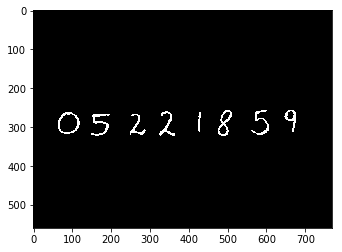

In [5]:
# Threshold the image
ret, im_th = cv2.threshold(im_gray2, 90, 255, cv2.THRESH_BINARY_INV)
plt.imshow(im_th, cmap='gray')

In [6]:
# Find contours in the image
ctrs = cv2.findContours(im_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[1]

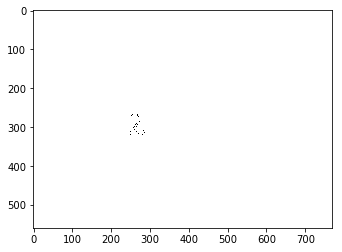

In [7]:
# show the first contour
copy = np.full([im.shape[0], im.shape[1]], 255, dtype='uint8')
for point in ctrs[0]:
    y = point[0][0]
    x = point[0][1]
    copy[x, y] = 0
    
plt.imshow(copy, cmap="gray")

In [8]:
# Get rectangles contains each contour
rects = [cv2.boundingRect(ctr) for ctr in ctrs]

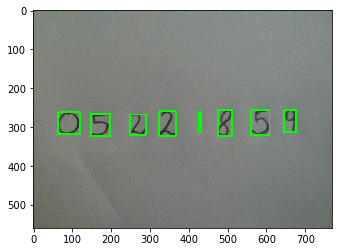

In [9]:
im_result = im.copy()
for rect in rects:
    # Draw the rectangles
    cv2.rectangle(im_result, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3) 

plt.imshow(im_result)